## Regressão para Preços de Seguros com Scikit Learn


### Importar Funções e Variáveis Globais

In [1]:
%run Variaveis_xperium_lh

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 4, Finished, Available)

Variáveis globais importadas


In [2]:
%run Funcoes

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 7, Finished, Available)

Funções Globais Importadas


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 8, Finished, Available)

In [4]:
# Configurando Pandas para mostrar duas casas depois da virgula e nao usar notação científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 9, Finished, Available)

### Carregando os Dados

In [5]:
#df_seguro_pd = pd.read_csv('abfss://e5ceae3a-60a1-4152-a54a-aabdd8a401c9@onelake.dfs.fabric.microsoft.com/8501efaa-d562-4a06-be28-483380a3147b/Files/1. Bronze')

path = f"{camada_bronze}/insurance.csv"
df_seguro = spark.read.options(delimiter = ",", header = True, enconding = "UTF-8", inferSchema = True).csv(path)
df_seguro_pd = df_seguro.toPandas()

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 10, Finished, Available)

In [6]:
df_seguro_pd.head()

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 11, Finished, Available)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [7]:
#qtd de linhas e colunas
df_seguro_pd.shape

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 12, Finished, Available)

(1338, 7)

In [8]:
#tipagem dos dados
df_seguro_pd.dtypes

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 13, Finished, Available)

age           int32
sex          object
bmi         float64
children      int32
smoker       object
region       object
charges     float64
dtype: object

In [9]:
#informações
#sem dados nulos
df_seguro_pd.info()

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 14, Finished, Available)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int32  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int32  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(2), object(3)
memory usage: 62.8+ KB


## EDA
### Estatistica descritiva


In [10]:
#analise variaveis numéricas
df_seguro_pd.describe()

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 15, Finished, Available)

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


Média de cobranças acima da mediana. Valores mais altos estão puxando a média para cima.

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 16, Finished, Available)

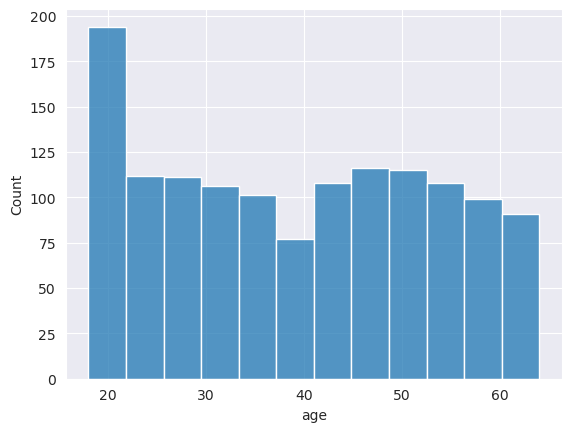

In [11]:
#Analisando distribuição de idades
sns.set_style('darkgrid')

#ajusta espaçamento do gráfico
plt.tight_layout()

#histograma
sns.histplot(data=df_seguro_pd, x='age');

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 17, Finished, Available)

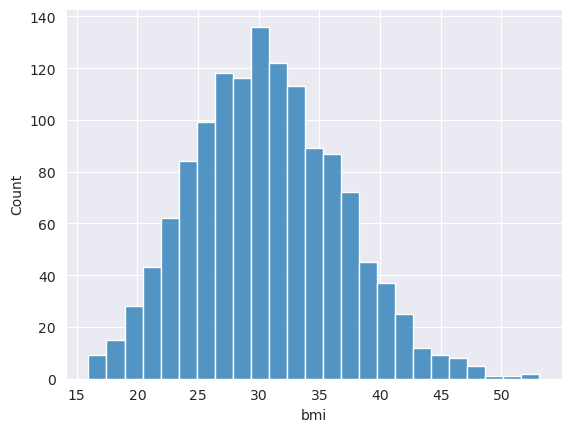

In [12]:
#Analisando distribuição de indice de massa corporal
sns.set_style('darkgrid')

#ajusta espaçamento do gráfico
plt.tight_layout()

#histograma
sns.histplot(data=df_seguro_pd, x='bmi');

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 18, Finished, Available)

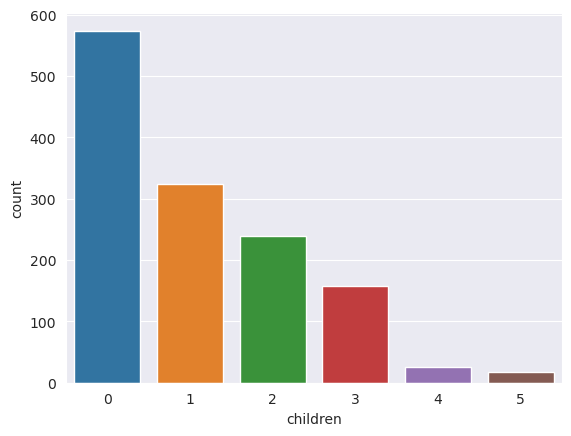

In [13]:
#Analisando distribuição de qtd de criancas
sns.set_style('darkgrid')

#ajusta espaçamento do gráfico
plt.tight_layout()

#countplot para numeros inteiros
sns.countplot(data=df_seguro_pd, x='children');

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 19, Finished, Available)

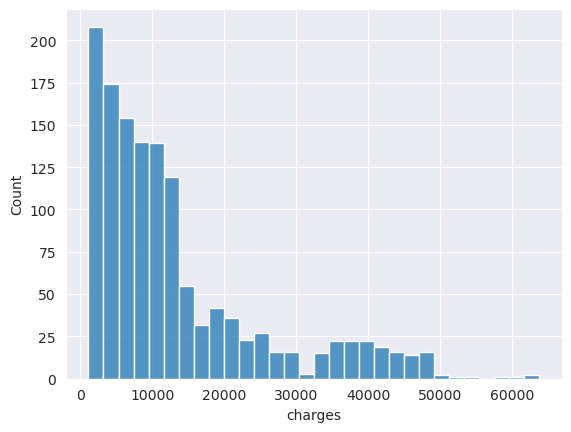

In [14]:
#Analisando distribuição do valor do seguro (target)
sns.set_style('darkgrid')

#ajusta espaçamento do gráfico
plt.tight_layout()

#histograma
sns.histplot(data=df_seguro_pd, x='charges');

### Relação entre as variáveis preditoras e a variável target

Analisar as dispersões das variáveis preditoras com a variável target(valor)

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 20, Finished, Available)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


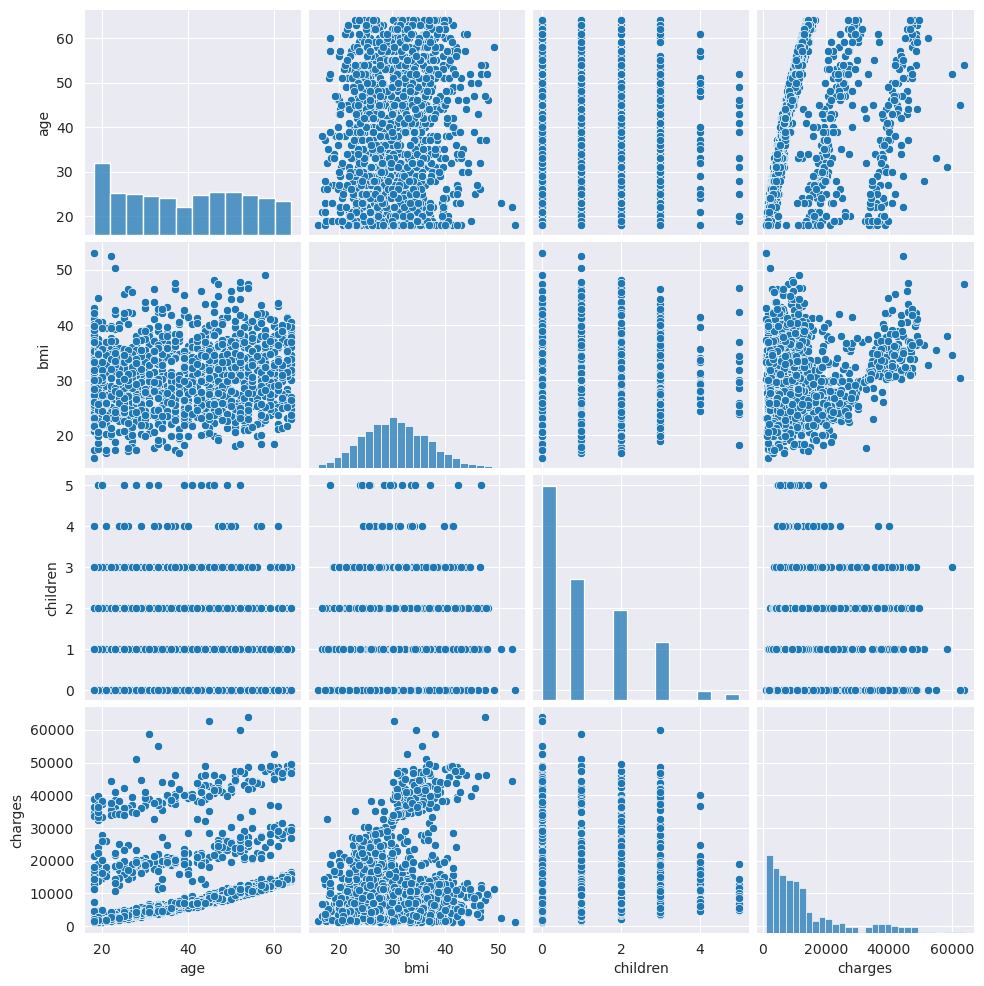

In [15]:
# pairplot cria gráficos de dispersão entre as variáveis e na diagonal principal mostra o histograma
sns.pairplot(data = df_seguro_pd);

Existe uma correlação entre as idades e o valor do plano de saúde. Provavelmente idade será uma variável importante para o modelo preditivo.

Caso as variáveis preditoras apresentem correlação entre elas. Devemos escolher uma delas para não termos colinearidade. Visto que estamos utilizando um modelo linear.

### Codificação de Variáveis categóricas

Transformar variáveis categóricas em variáveis numéricas

In [16]:
df_seguro_pd.head()

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 21, Finished, Available)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [17]:
# Como temos somente variáveis nominais (categorias sem ordem de preferencia), utilizamos o One Hot Encoder
# Podemos utilizar o get_dummies do Pandas ou utilizar o OneHotEncoder do ScikitLearn
# Para variaveis com duas classes (sex e smoker), podemos fazer mapeamento direto

df_seguro_pd['female'] = df_seguro_pd['sex'].map({'female':1, 'male':0})
df_seguro_pd['smoker'] = df_seguro_pd['smoker'].map({'yes':1, 'no':0})
df_seguro_pd = df_seguro_pd.drop('sex', axis = 1)
df_seguro_pd.head()

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 22, Finished, Available)

,age,bmi,children,smoker,region,charges,female
0,19,27.90,0,1,southwest,16884.92,1
1,18,33.77,1,0,southeast,1725.55,0
2,28,33.00,3,0,southeast,4449.46,0
3,33,22.70,0,0,northwest,21984.47,0
4,32,28.88,0,0,northwest,3866.86,0


In [18]:
# Analisando regioes
df_seguro_pd['region'].unique()

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 23, Finished, Available)

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [19]:
# Para as regioes vamos usar o One Hot Encoder
colunas_regiao = pd.get_dummies(df_seguro_pd['region'], drop_first = True)
colunas_regiao.head()

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 24, Finished, Available)

,northwest,southeast,southwest
0,False,False,True
1,False,True,False
2,False,True,False
3,True,False,False
4,True,False,False


In [20]:
# Concatenar colunas na tabela df_seguro_pd
#axis = 1 junta colunas, axis = 0 junta linhas
df_seguro_pd = pd.concat([df_seguro_pd, colunas_regiao], axis = 1)
df_seguro_pd = df_seguro_pd.drop('region', axis = 1)

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 25, Finished, Available)

In [21]:
df_seguro_pd.head()

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 26, Finished, Available)

,age,bmi,children,smoker,charges,female,northwest,southeast,southwest
0,19,27.90,0,1,16884.92,1,False,False,True
1,18,33.77,1,0,1725.55,0,False,True,False
2,28,33.00,3,0,4449.46,0,False,True,False
3,33,22.70,0,0,21984.47,0,True,False,False
4,32,28.88,0,0,3866.86,0,True,False,False


### Definindo Variaveis preditoras e Target
x -> Preditoras

y -> Target

In [22]:
X = df_seguro_pd.drop('charges', axis = 1)
y = df_seguro_pd[['charges']]

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 27, Finished, Available)

In [23]:
# Variaveis Preditoras / Independentes / Features
X.head()

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 28, Finished, Available)

,age,bmi,children,smoker,female,northwest,southeast,southwest
0,19,27.90,0,1,1,False,False,True
1,18,33.77,1,0,0,False,True,False
2,28,33.00,3,0,0,False,True,False
3,33,22.70,0,0,0,True,False,False
4,32,28.88,0,0,0,True,False,False


In [24]:
# Variaveis Dependente / Target / Alvo / Label
y.head()

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 29, Finished, Available)

,charges
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


### Separação de Bases
Separar base de treino e teste para evitar data leakage (sobreajuste) porque vamos fazer feature scalling, por exemplo, e tais transformações devem ser realizadas depois do SPLI(separação).

In [25]:
# Função que separa a base de treino e teste
# Depois será feito cross validation com a base de treino

from sklearn.model_selection import train_test_split

#devolve uma tupla de 4 elementos: X_treino, X_teste, y_treino, y_teste
# 20% para teste
# random = 42 para fixar a aleatoriedade e conseguir reproduzir esses resultados
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size= .2, random_state= 42)

#ver qtd de linhas em cada parte
X_treino.shape, y_treino.shape, X_teste.shape, y_teste.shape

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 30, Finished, Available)

((1070, 8), (1070, 1), (268, 8), (268, 1))

### Feature Scaling - Padronizando escala das variáveis
Como usaremos modelos lineares é importante realizar o Scaling das Features para mante-las numa mesma ordem de grandeza. Utilizaremos MinMaxScaler, onde os valores mínimos serão definidos como 0 e os valores máximos serão definidos como 1. Os demais serão posicionados nessa escala.

Isso é feito APENAS NOS DADOS DE TESTE para não termos sobreajuste.

In [26]:
df_seguro_pd.describe()

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 31, Finished, Available)

,age,bmi,children,smoker,charges,female
count,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,0.20,13270.42,0.49
std,14.05,6.10,1.21,0.40,12110.01,0.50
min,18.00,15.96,0.00,0.00,1121.87,0.00
25%,27.00,26.30,0.00,0.00,4740.29,0.00
50%,39.00,30.40,1.00,0.00,9382.03,0.00
75%,51.00,34.69,2.00,0.00,16639.91,1.00
max,64.00,53.13,5.00,1.00,63770.43,1.00


In [27]:
# Normalização - MinMaxScaler; Padronização - StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Criar scaler
scaler = MinMaxScaler()

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 32, Finished, Available)

In [28]:
type(scaler)

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 33, Finished, Available)

sklearn.preprocessing._data.MinMaxScaler

In [29]:
colunas = X_treino.columns

# IMPORTANTE! Fit no Treino! Transform no teste!
X_treino[colunas] = scaler.fit_transform(X_treino)
X_teste[colunas] = scaler.transform(X_teste)

X_treino.shape , X_teste.shape

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 34, Finished, Available)

((1070, 8), (268, 8))

In [30]:
X_treino.head()

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 35, Finished, Available)

,age,bmi,children,smoker,female,northwest,southeast,southwest
560,0.61,0.11,0.40,0.00,1.00,1.00,0.00,0.00
1285,0.63,0.22,0.00,0.00,1.00,0.00,0.00,0.00
1142,0.74,0.24,0.00,0.00,1.00,0.00,1.00,0.00
969,0.46,0.49,1.00,0.00,1.00,0.00,1.00,0.00
486,0.78,0.15,0.60,0.00,1.00,1.00,0.00,0.00


In [31]:
X_teste.head()

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 36, Finished, Available)

,age,bmi,children,smoker,female,northwest,southeast,southwest
764,0.59,0.25,0.40,0.00,1.00,0.00,0.00,0.00
887,0.39,0.38,0.00,0.00,1.00,1.00,0.00,0.00
890,1.00,0.29,0.00,1.00,1.00,1.00,0.00,0.00
1293,0.61,0.26,0.60,0.00,0.00,1.00,0.00,0.00
259,0.02,0.43,0.00,1.00,0.00,1.00,0.00,0.00


In [32]:
X_treino.describe()

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 37, Finished, Available)

,age,bmi,children,smoker,female,northwest,southeast,southwest
count,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00
mean,0.46,0.39,0.22,0.21,0.49,0.24,0.26,0.25
std,0.31,0.16,0.24,0.40,0.50,0.43,0.44,0.43
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.20,0.28,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.47,0.38,0.20,0.00,0.00,0.00,0.00,0.00
75%,0.72,0.50,0.40,0.00,1.00,0.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [33]:
#Possui valores minimos e máximos diferentes de 0 e 1
X_teste.describe()

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 38, Finished, Available)

,age,bmi,children,smoker,female,northwest,southeast,southwest
count,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00
mean,0.45,0.41,0.21,0.20,0.52,0.26,0.30,0.23
std,0.30,0.17,0.23,0.40,0.50,0.44,0.46,0.42
min,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.17,0.29,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.43,0.40,0.20,0.00,1.00,0.00,0.00,0.00
75%,0.70,0.52,0.40,0.00,1.00,1.00,1.00,0.00
max,1.00,0.99,1.00,1.00,1.00,1.00,1.00,1.00


### Analisando a Correlação entre variáveis
Quando utilizamos modelos lineares é importante saber se as variáveis preditoras possuem colinearidade entre si. Caso possuam, convem remover uma das variáveis para não afetar o modelo.

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 39, Finished, Available)

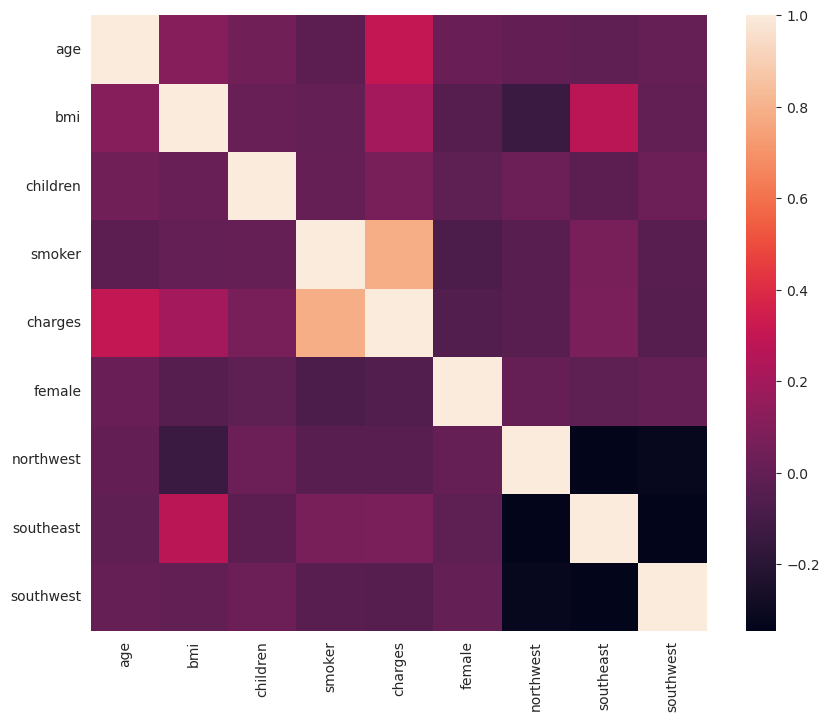

In [34]:
figura, graficos = plt.subplots(figsize = (10,8))
corr = df_seguro_pd.corr()

sns.heatmap(corr, mask=np.zeros_like(corr, dtype = bool)
                                    , square= True
                                    , ax= graficos);

## Modelos de Machine Learning
### Regressão Linear - ML
Primeiro Modelo que vamos treinar é o de Regressão Linear.

Iremos utilizar Cross Validation para evitar overfit e ter uma base de comparação com outros modelos.

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# criando o modelo / preditor / regressor / estimador
regressao_linear = LinearRegression()

# Vamos Treinar utilizando Cross Validation
# Valores Root Mean Squared Error da Regressao Linear
valores_rmse_rl = cross_val_score(estimator = regressao_linear
                                , X = X_treino
                                , y = y_treino
                                , cv = 10 # 10 partes de cross validação
                                , scoring= 'neg_root_mean_squared_error') # neg para pegar o menor erro

#Retorna os 10 valores de Erro encontrados
valores_rmse_rl

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 40, Finished, Available)

array([-6073.99997254, -6580.87166754, -5233.82683473, -6045.25239632,
       -5836.4647871 , -6127.43525895, -7281.08373608, -6321.52706355,
       -6193.3145481 , -5637.06299714])

In [36]:
# Transformando os erros de predição para valores positivos
valores_rmse_rl = valores_rmse_rl * -1
valores_rmse_rl

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 41, Finished, Available)

array([6073.99997254, 6580.87166754, 5233.82683473, 6045.25239632,
       5836.4647871 , 6127.43525895, 7281.08373608, 6321.52706355,
       6193.3145481 , 5637.06299714])

In [37]:
# Erro médio
media_rmse_rl = valores_rmse_rl.mean()
media_rmse_rl

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 42, Finished, Available)

6133.0839262055

### Árvore de Regressão

In [38]:
from sklearn.tree import DecisionTreeRegressor

arvore_regressao = DecisionTreeRegressor()

# Vamos treinar utilizando cross validation (sempre!!)
valores_rmse_arvore = cross_val_score(
                            estimator = arvore_regressao
                            , X = X_treino
                            , y = y_treino
                            , cv = 10 # cross validation
                            , scoring = 'neg_root_mean_squared_error'
)

valores_rmse_arvore

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 43, Finished, Available)

array([-6895.29937477, -7528.00886544, -6572.98449571, -7414.65868   ,
       -6940.2394958 , -5619.08169613, -6978.56817088, -6965.94448217,
       -6644.66193768, -5922.46108072])

In [39]:
# Transformando os erros de predição para valores positivos
valores_rmse_arvore = valores_rmse_arvore * -1
valores_rmse_arvore

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 44, Finished, Available)

array([6895.29937477, 7528.00886544, 6572.98449571, 7414.65868   ,
       6940.2394958 , 5619.08169613, 6978.56817088, 6965.94448217,
       6644.66193768, 5922.46108072])

In [40]:
media_rmse_arvore = valores_rmse_rl.mean()
media_rmse_arvore

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 45, Finished, Available)

6133.0839262055

Considerando a média dos erros, o modelo de regressão linear foi melhor que o modelo de arvore de regressão.

#### E se retirarmos as colunas de região. Na análise de correlação elas não mostraram muita influência na variável target.

In [41]:
X_treino.columns

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 46, Finished, Available)

Index(['age', 'bmi', 'children', 'smoker', 'female', 'northwest', 'southeast',
       'southwest'],
      dtype='object')

In [42]:
colunas_regiao = ['northwest', 'southeast', 'southwest']

# Vamos treinar utilizando cross validation (sempre!!)
valores_rmse_rl_sem_regiao = cross_val_score(
                            estimator = regressao_linear
                            , X = X_treino.drop(colunas_regiao, axis = 1)
                            , y = y_treino
                            , cv = 10 # cross validation
                            , scoring = 'neg_root_mean_squared_error'
)

valores_rmse_rl_sem_regiao.mean() * -1

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 47, Finished, Available)

6121.545062597131

In [43]:
#Arvore
# Vamos treinar utilizando cross validation (sempre!!)
valores_rmse_arvore_sem_regiao = cross_val_score(
                            estimator = arvore_regressao
                            , X = X_treino.drop(colunas_regiao, axis = 1)
                            , y = y_treino
                            , cv = 10 # cross validation
                            , scoring = 'neg_root_mean_squared_error'
)

valores_rmse_arvore_sem_regiao.mean() * -1

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 48, Finished, Available)

6840.223812084881

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 49, Finished, Available)

Text(0.5, 1.0, 'Comparação RMSE')

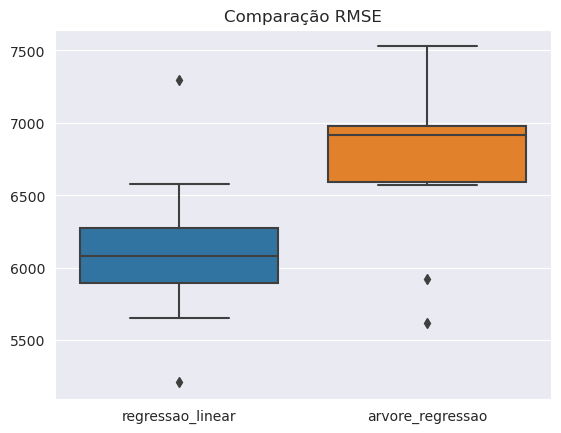

In [44]:
rmse = pd.DataFrame({'regressao_linear': valores_rmse_rl_sem_regiao*-1, 'arvore_regressao': valores_rmse_arvore})

sns.boxplot(data=rmse).set_title('Comparação RMSE')

Regressão linear apresenta o erro menos distribuído que o da árvore de regressão e com valores menores. Pode ser necessário analisar estatisticamente para garantir que isso é verdadeiro, pois as curvas ainda se sobrepoe em alguns valores.

### Modelo Campeão - Regressão Linear sem regiões.

Agora vamos treinar o modelo em toda base de treinamento.

In [45]:
regressao_linear.fit(X_treino.drop(colunas_regiao, axis = 1), y_treino)

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 50, Finished, Available)

2024-05-26:17:41:00,300 WARNING  [tracking_store.py:153] log_inputs not supported


LinearRegression()

In [46]:
regressao_linear.coef_

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 51, Finished, Available)

array([[1.18251723e+04, 1.21744207e+04, 2.13627215e+03, 2.36539033e+04,
        7.95178837e+00]])

In [47]:
df_coeficientes = pd.DataFrame(regressao_linear.coef_)
df_coeficientes.columns = regressao_linear.feature_names_in_
df_coeficientes

# esses são os coeficientes da regressão linear. A cada um ano a mais de idade o custo do seguro aumenta 11825.17.
# O mesmo vale para os outros coeficientes

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 52, Finished, Available)

,age,bmi,children,smoker,female
0,11825.17,12174.42,2136.27,23653.90,7.95


Podemos calcular o p-valor dos coeficientes (significancia estatistica) dos coeficientes de cada regressão usando o statsmodels

In [48]:
import statsmodels.api as sm

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 53, Finished, Available)

In [49]:
#Modelo OLS (Ordinary Least Squares)
rl_statsmodels = sm.OLS(y_treino, X_treino.drop(colunas_regiao, axis = 1))
resultado_fit = rl_statsmodels.fit()
print(resultado_fit.summary())

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 54, Finished, Available)

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.883
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              1601.
Date:                Sun, 26 May 2024   Prob (F-statistic):                        0.00
Time:                        17:41:22   Log-Likelihood:                         -10854.
No. Observations:                1070   AIC:                                  2.172e+04
Df Residuals:                    1065   BIC:                                  2.174e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Os coeficientes com p-valores < 0,05 são considerados válidos. As variáveis de crianças e sexo não são estatísticamente válidos, devemos ter cautela ao analisar seu impacto no preço.

### Avaliando o modelo na base de teste

In [50]:
# Ver estimadores sickit Learn
# estimador é ajustado com fit()
# estimador prediz com predict()
precos_preditos = regressao_linear.predict(X_teste.drop(colunas_regiao, axis = 1))
precos_preditos[:5]

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 55, Finished, Available)

2024-05-26:17:41:24,346 WARNING  [tracking_store.py:153] log_inputs not supported


array([[ 8554.81711589],
       [ 6973.58746745],
       [36798.60416104],
       [ 9417.88282303],
       [26871.68031081]])

In [51]:
len(precos_preditos)

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 56, Finished, Available)

268

In [52]:
#Valores Reais
y_teste.head()

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 57, Finished, Available)

,charges
764,9095.07
887,5272.18
890,29330.98
1293,9301.89
259,33750.29


In [53]:
predicoes_vs_real = pd.DataFrame({'predicao': precos_preditos.flatten(), 'real': y_teste.values.flatten()})
predicoes_vs_real['diferenca_abs'] = abs(predicoes_vs_real['predicao'] - predicoes_vs_real['real'])
predicoes_vs_real.head(10)

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 58, Finished, Available)

,predicao,real,diferenca_abs
0,8554.82,9095.07,540.25
1,6973.59,5272.18,1701.41
2,36798.60,29330.98,7467.62
3,9417.88,9301.89,115.99
4,26871.68,33750.29,6878.61
5,11097.38,4536.26,6561.12
6,145.28,2117.34,1972.06
7,16746.17,14210.54,2535.63
8,747.53,3732.63,2985.09
9,11153.68,10264.44,889.23


Avaliando o modelo em relação a média com r quadrado. 

In [54]:
from sklearn.metrics import r2_score

r2_score(y_true = y_teste, y_pred = precos_preditos)

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 59, Finished, Available)

0.7811302113434095

0,78 não é tão ruim, o modelo explica bem a variável target.

#### Testando a predição com novos inputs

In [55]:
X_teste.drop(colunas_regiao, axis = 1).columns

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 60, Finished, Available)

Index(['age', 'bmi', 'children', 'smoker', 'female'], dtype='object')

In [56]:
idade = 20
imc = 35
criancas = 1
fumante = 1
sexo = 0

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 61, Finished, Available)

In [57]:
#Realizando o scaling das features
# Completamos com 1,1,1 porque o x_treino origina tinha colunas de regiao
features = [[idade, imc, criancas, fumante, sexo, 1, 1, 1]]

# usando o scaler do treino (nada de fitar de novo)
features = scaler.transform(features)
features

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 62, Finished, Available)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.04347826, 0.51224105, 0.2       , 1.        , 0.        ,
        1.        , 1.        , 1.        ]])

In [58]:
# pegando somentes as 5 featurs, sem regiao
features = features[:,:-3]
features

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 63, Finished, Available)

array([[0.04347826, 0.51224105, 0.2       , 1.        , 0.        ]])

In [59]:
# resultado da predição
regressao_linear.predict(features)

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 64, Finished, Available)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
2024-05-26:17:41:31,227 WARNING  [tracking_store.py:153] log_inputs not supported


array([[28564.80692529]])

### Salvando tabelas delta

In [65]:
#dados originais
from pyspark.sql import SparkSession

# Inicializa uma SparkSession
spark = SparkSession.builder.appName("SalvarDataFrameComoTabela").enableHiveSupport().getOrCreate()

# Cria um DataFrame
df = spark.createDataFrame(df_seguro_pd)

# Salva o DataFrame como uma tabela persistente
path = f"{camada_silver}/dados_seguro_completos"
df.write.format("delta").mode("overwrite").option("mergeSchema", "true").saveAsTable("dados_seguro_completos")

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 70, Finished, Available)

In [66]:
#dados teste
from pyspark.sql import SparkSession

# Inicializa uma SparkSession
spark = SparkSession.builder.appName("SalvarDataFrameComoTabela").enableHiveSupport().getOrCreate()

# Cria um DataFrame
df = spark.createDataFrame(X_teste)

# Salva o DataFrame como uma tabela persistente
path = f"{camada_silver}/dados_seguro_teste"
df.write.format("delta").mode("overwrite").option("mergeSchema", "true").saveAsTable("dados_seguro_teste")

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 71, Finished, Available)

In [68]:
#dados previstos
from pyspark.sql import SparkSession

# Inicializa uma SparkSession
spark = SparkSession.builder.appName("SalvarDataFrameComoTabela").enableHiveSupport().getOrCreate()

# Cria um DataFrame
df = spark.createDataFrame(predicoes_vs_real)

# Salva o DataFrame como uma tabela persistente
path = f"{camada_silver}/dados_seguro_preditos"
df.write.format("delta").mode("overwrite").option("mergeSchema", "true").saveAsTable("dados_seguro_preditos")

StatementMeta(, 7a5450d8-69d2-4a57-abca-aa777cd97915, 73, Finished, Available)